In [64]:
import nltk; 
import re
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora

from utils import extract_text_from_url
import json
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')
nlp = spacy.load('en_core_web_sm')
import pandas as pd
from collections import Counter
import nltk
# nltk.download('vader_lexicon')


In [65]:
#creating corpus
variety_corpus_1 = []
with open('/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/News_Category_Dataset_v3.json', 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Parse the JSON object in each line
        data = json.loads(line)
        # Extract the short description and append it to the list
        short_description = data.get('short_description', '')
        line_sentences = short_description.strip().split('. ')
        variety_corpus_1.extend(line_sentences)
        # variety_corpus_1.append(short_description)

In [66]:
variety_corpus_2 = []
import os
folder_path = '/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/SoUcorpus_selected'
def get_files_in_folder(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(file_name)
    
    # Return the list of file names
    return file_names

file_names = get_files_in_folder(folder_path)
count = 0
for filename in file_names:
    try:
        with open(os.path.join(folder_path, filename), 'r') as file:
            # Iterate over each line in the file
            for line in file:
                # Split the line into sentences based on the full stop
                line_sentences = line.strip().split('. ')
                # Append each sentence to the list of sentences
                variety_corpus_2.extend(line_sentences)
    except Exception as e:
        count += 1
        print(e)
print(count)

'utf-8' codec can't decode byte 0xb8 in position 99: invalid start byte
1


In [67]:
variety_corpus_3 = []
files = ['/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/news_dataset_2/Data_Train.csv','/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/news_dataset_2/Data_Test.csv']
for file in files:
    news_categ_df = pd.read_csv(file, encoding='latin')
    print(news_categ_df.columns)
    for index, row in news_categ_df.iterrows():
        try:
            body = row['STORY']
            line_sentences = body.strip().split('. ')
            # Append each sentence to the list of sentences
            variety_corpus_3.extend(line_sentences)
        except Exception as e:
            print(e)

Index(['STORY', 'SECTION'], dtype='object')
Index(['STORY'], dtype='object')


In [68]:
variety_corpus_4 = []
news_dataset_file_3 = '/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/uci-news-aggregator.csv'
news_categ_df = pd.read_csv(news_dataset_file_3)
print(news_categ_df.columns)
for index, row in news_categ_df.iterrows():
    try:
        title = row['TITLE']
        variety_corpus_4.append(title)
    except Exception as e:
        print(e)

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')


In [69]:
variety_corpus_5 = []
folder_path = '/Users/laharianne/Desktop/Spring 2024/CS 510 Adv Info Retrieval/topic_modelling_bookmarker/Datasets/news_dataset_4'
file_names = get_files_in_folder(folder_path)
count = 0
for filename in file_names:
    try:
        df = pd.read_csv(os.path.join(folder_path, filename))
        for index, row in df.iterrows():  
            content = row['description']  
            line_sentences = content.strip().split('. ')
            variety_corpus_5.extend(line_sentences)
    except Exception as e:
        count += 1
        print(e)
print(count)


0


In [70]:
variety_corpus = []
variety_corpus.extend(variety_corpus_1)
print(len(variety_corpus))
variety_corpus.extend(variety_corpus_2)
print(len(variety_corpus))
variety_corpus.extend(variety_corpus_3)
print(len(variety_corpus))
variety_corpus.extend(variety_corpus_4)
print(len(variety_corpus))
variety_corpus.extend(variety_corpus_5)
print(len(variety_corpus))

301271
325232
358339
780758
792821


In [267]:
# with open('corpus_lda.txt','w') as file:
#     for sent in variety_corpus:
#         file.write(sent)
#         file.write('\n')


In [8]:
# df = pd.DataFrame({'Sentences': variety_corpus})
# df.to_csv('variety_corpus.csv', index=False)

In [274]:
# variety_corpus_read = []
# corpus_read = pd.read_csv('variety_corpus.csv')
# for index,row in corpus_read.iterrows():
#     variety_corpus_read.append(row['Sentences'])
# print(len(variety_corpus_read))

792821


In [71]:
def train_lda_model(clean_corpus,num_topics, num_words):
    dict_ = corpora.Dictionary(clean_corpus)
    doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dict_, passes=1, random_state=0, eval_every=None)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=num_words))
    return ldamodel,dict_

In [102]:
# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))

# Stopwords from stopwords-json
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stop = stop.union(set(stopwords_json['en']))

# punctuation 
exclude = set(string.punctuation) 
# exclude = exclude.union(set(top_k_words))

# lemmatization
lemma = WordNetLemmatizer() 
porter = PorterStemmer()

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    pattern = r'[^a-zA-Z0-9\s]'
    stop_free = " ".join([re.sub(pattern, '', i) for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  

    #stemming
    stemmed = " ".join(porter.stem(word) for word in normalized.split())

    return stemmed

In [103]:
# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in variety_corpus]

In [118]:
# ldamodel_5,dict_5 = train_lda_model(clean_corpus, 5, 10)

[(0, '0.020*"india" + 0.012*"test" + 0.010*"offici" + 0.008*"student" + 0.007*"updat" + 0.006*"report" + 0.006*"west" + 0.005*"al" + 0.005*"beyonc" + 0.005*"app"'), (1, '0.014*"ebola" + 0.013*"googl" + 0.013*"cent" + 0.013*"microsoft" + 0.010*"bank" + 0.009*"team" + 0.008*"iphon" + 0.008*"websit" + 0.007*"data" + 0.007*"featur"'), (2, '0.021*"year" + 0.013*"2014" + 0.008*"million" + 0.008*"ice" + 0.007*"exam" + 0.007*"3" + 0.007*"khan" + 0.007*"phone" + 0.007*"studi" + 0.006*"offic"'), (3, '0.011*"video" + 0.010*"galaxi" + 0.010*"game" + 0.009*"film" + 0.008*"star" + 0.008*"watch" + 0.007*"final" + 0.007*"samsung" + 0.007*"juli" + 0.006*"play"'), (4, '0.017*"appl" + 0.012*"price" + 0.011*"r" + 0.011*"share" + 0.011*"stock" + 0.010*"market" + 0.008*"5" + 0.008*"buy" + 0.007*"rate" + 0.007*"sale"')]


In [119]:
# ldamodel_10, dict_10 = train_lda_model(clean_corpus, 10, 10)

[(0, '0.024*"test" + 0.021*"microsoft" + 0.016*"launch" + 0.015*"report" + 0.014*"5" + 0.014*"rate" + 0.013*"studi" + 0.010*"health" + 0.010*"global" + 0.010*"servic"'), (1, '0.030*"price" + 0.017*"billion" + 0.016*"expect" + 0.015*"close" + 0.015*"featur" + 0.013*"deal" + 0.013*"dollar" + 0.012*"fall" + 0.011*"data" + 0.011*"airlin"'), (2, '0.030*"2" + 0.029*"sale" + 0.022*"big" + 0.020*"khan" + 0.017*"take" + 0.013*"andi" + 0.011*"the" + 0.011*"2015" + 0.011*"dy" + 0.010*"true"'), (3, '0.027*"galaxi" + 0.025*"googl" + 0.017*"day" + 0.014*"facebook" + 0.014*"guardian" + 0.013*"samsung" + 0.012*"beyonc" + 0.012*"live" + 0.012*"earn" + 0.010*"twitter"'), (4, '0.029*"2014" + 0.026*"r" + 0.020*"bank" + 0.019*"win" + 0.019*"team" + 0.018*"buy" + 0.018*"result" + 0.018*"west" + 0.016*"crore" + 0.013*"point"'), (5, '0.051*"india" + 0.019*"student" + 0.018*"review" + 0.017*"ice" + 0.013*"start" + 0.011*"univers" + 0.011*"intern" + 0.010*"car" + 0.009*"experi" + 0.009*"network"'), (6, '0.016*"

In [12]:
ldamodel_20, dict_20 = train_lda_model(clean_corpus, 20, 10)

[(0, '0.064*"launch" + 0.057*"set" + 0.043*"call" + 0.034*"ceo" + 0.031*"fed" + 0.030*"june" + 0.024*"order" + 0.023*"support" + 0.022*"friday" + 0.020*"court"'), (1, '0.042*"facebook" + 0.041*"websit" + 0.037*"busi" + 0.034*"post" + 0.031*"australia" + 0.028*"trailer" + 0.025*"pro" + 0.024*"player" + 0.024*"medium" + 0.023*"research"'), (2, '0.041*"updat" + 0.040*"west" + 0.033*"movi" + 0.026*"countri" + 0.023*"tv" + 0.023*"higher" + 0.022*"find" + 0.022*"andi" + 0.020*"latest" + 0.020*"uk"'), (3, '0.080*"video" + 0.042*"ice" + 0.040*"big" + 0.032*"live" + 0.029*"drop" + 0.028*"life" + 0.026*"man" + 0.024*"woman" + 0.021*"list" + 0.020*"bad"'), (4, '0.066*"googl" + 0.055*"play" + 0.045*"win" + 0.038*"talk" + 0.036*"run" + 0.030*"actor" + 0.029*"product" + 0.025*"tech" + 0.024*"said" + 0.019*"chri"'), (5, '0.056*"2014" + 0.050*"open" + 0.047*"final" + 0.036*"10" + 0.025*"offic" + 0.025*"home" + 0.022*"intern" + 0.022*"trade" + 0.021*"car" + 0.018*"12"'), (6, '0.048*"2" + 0.045*"announc

In [13]:
# # business 
data1 = extract_text_from_url("https://www.nbcnews.com/business") 
#lifestyle and entertainment
data2 = extract_text_from_url("https://www.hollywoodreporter.com/movies/movie-news/dermot-mulroney-didnt-work-year-after-my-best-friends-wedding-1235880937/") 
#technology
data3 = extract_text_from_url("https://www.cnbc.com/2024/04/25/nvidia-backed-synthesia-unveils-ai-avatars-that-can-be-generated-from-text.html") 
# politics
data4 = extract_text_from_url("https://www.nbcnews.com/politics")
#movies
data5 = extract_text_from_url("https://www.badmovies.org/")
#literature
data6 = extract_text_from_url("https://en.wikipedia.org/wiki/Shakespeare:_The_World_as_Stage")

In [17]:
ldamodel_20.save('lda_model_20.model')

#### MODEL TESTING

In [46]:
import matplotlib.pyplot as plt
#Reading results from test.py
results_df = pd.read_csv("ModelTestResults.csv")
results_df.describe()
grouped_df = results_df.groupby(["Topic","Match"]).agg('count')


In [47]:
from IPython.display import display
display(grouped_df)

Link  Model_Topic
Topic                     Match                       
Business & Politics       Match        50           50
                          Not Match     3            3
Entertainment & lifestyle Match        20           20
                          Not Match     1            1
Technology & Science      Match        24           24
                          Not Match     2            2

In [48]:
matched = len(results_df[results_df['Match'] == 'Match'])
not_matched = len(results_df[results_df['Match']=='Not Match'])
accuracy = matched/(matched + not_matched) * 100
print(f"Accuracy of the model : {accuracy}%")

Accuracy of the model : 94.0%


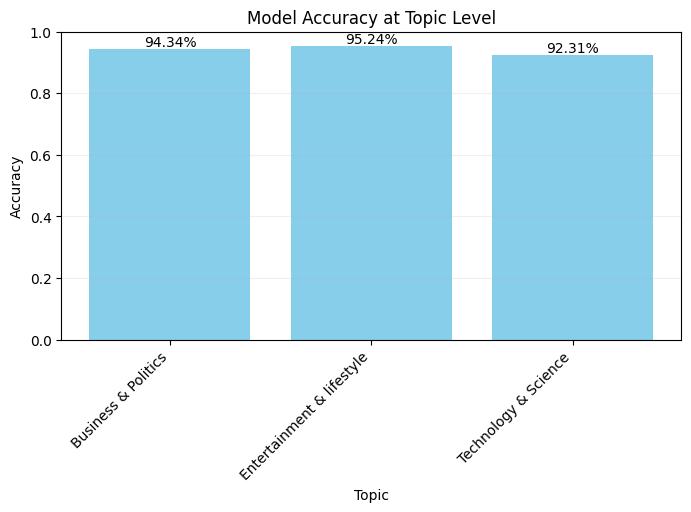

In [63]:
topic_accuracy = {}
for topic in results_df['Topic'].unique():
    topic_df = results_df[results_df['Topic'] == topic]
    matched = len(topic_df[topic_df['Match'] == 'Match'])
    not_matched = len(topic_df[topic_df['Match'] == 'Not Match'])
    accuracy = matched / (matched + not_matched)
    topic_accuracy[topic] = accuracy

# Plot the accuracy at the topic level
plt.figure(figsize=(8, 4))
bars = plt.bar(topic_accuracy.keys(), topic_accuracy.values(), color='skyblue')
plt.title("Model Accuracy at Topic Level")
plt.xlabel("Topic")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')


plt.show()

### VISUALIZATIONS

In [81]:
lda_model =  gensim.models.LdaModel.load('./model/lda_model_20.model')
dictionary = gensim.corpora.Dictionary.load_from_text("./model/dict_20.txt")

Frequency Distribution of Word Counts in Documents


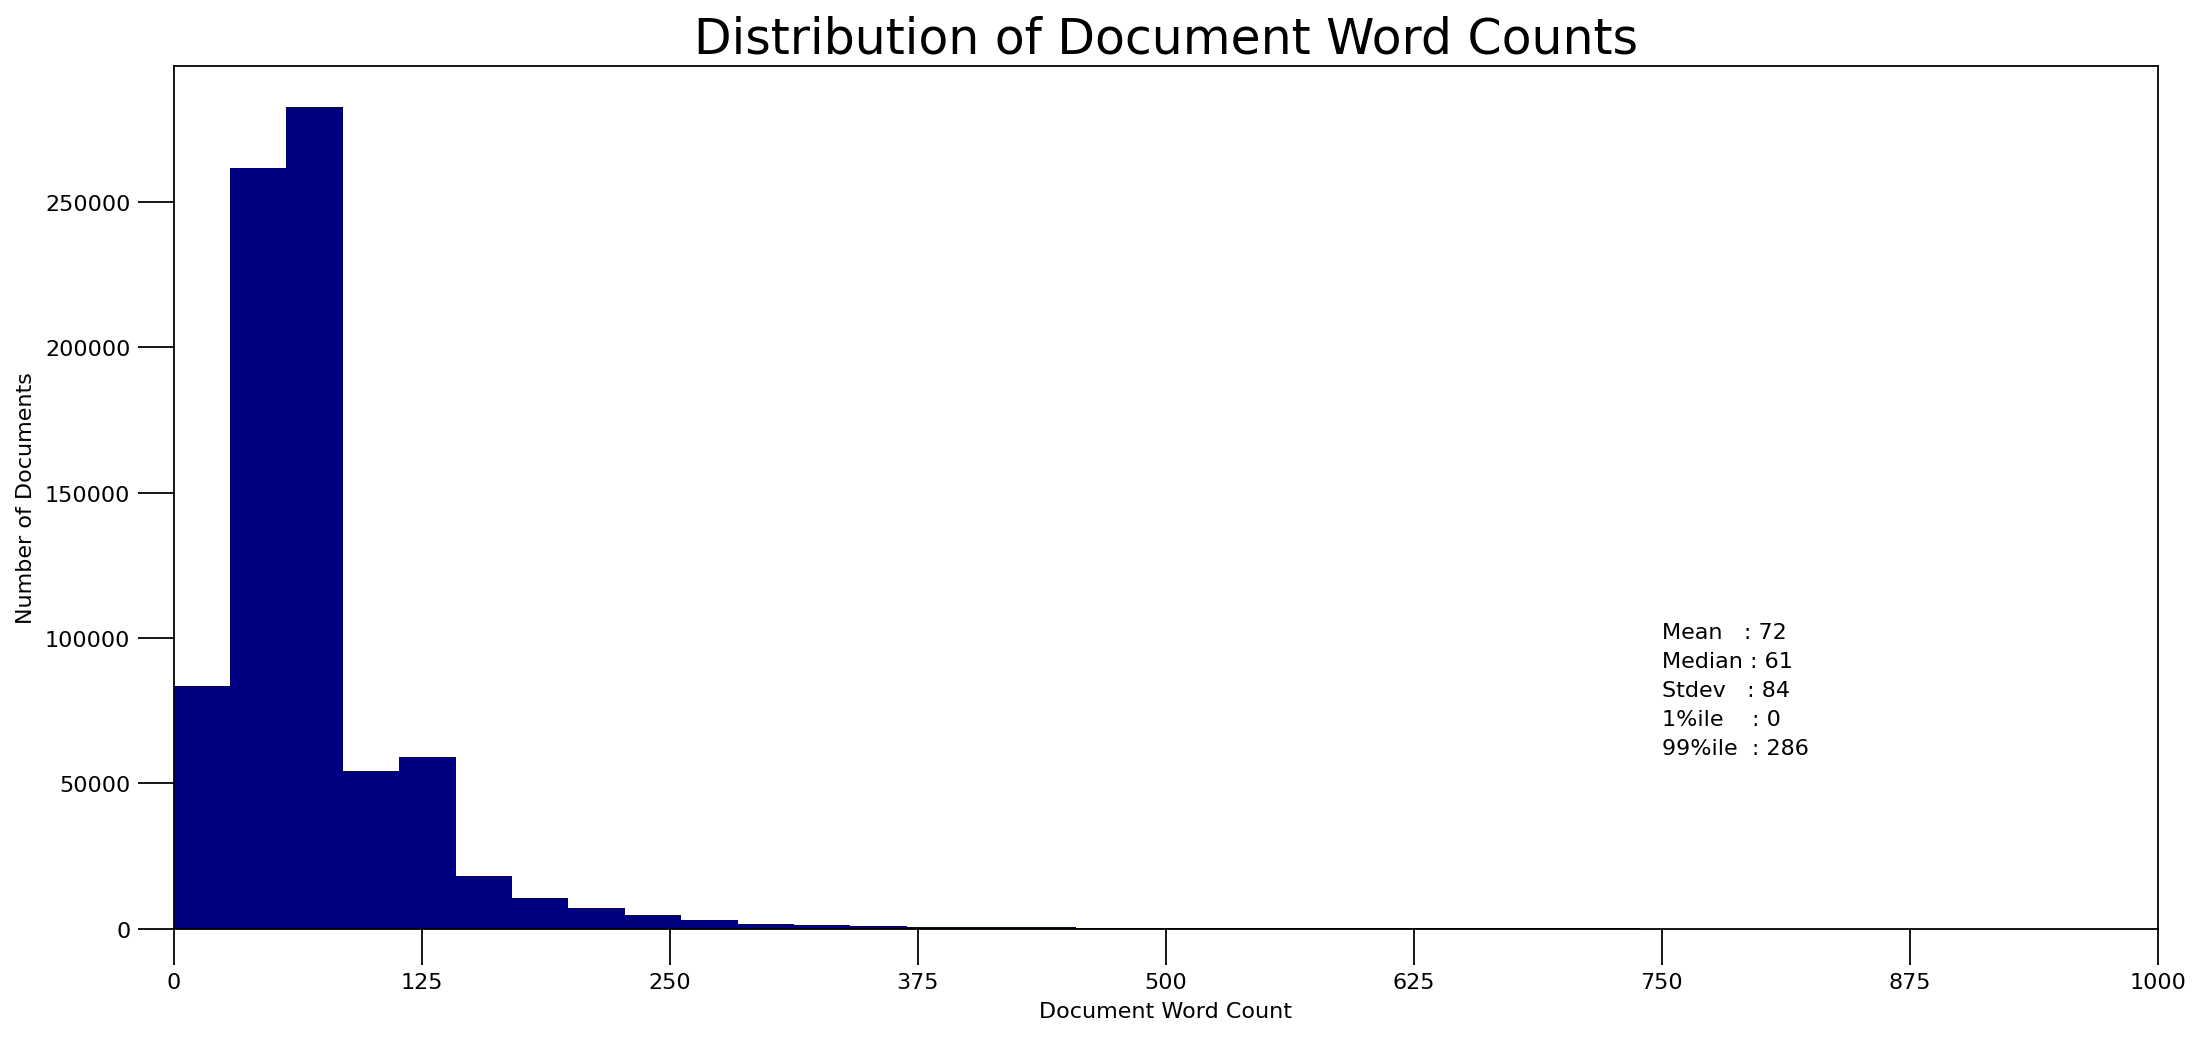

In [80]:
doc_lens = [len(d) for d in variety_corpus]

plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 90000, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 80000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 70000, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 60000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

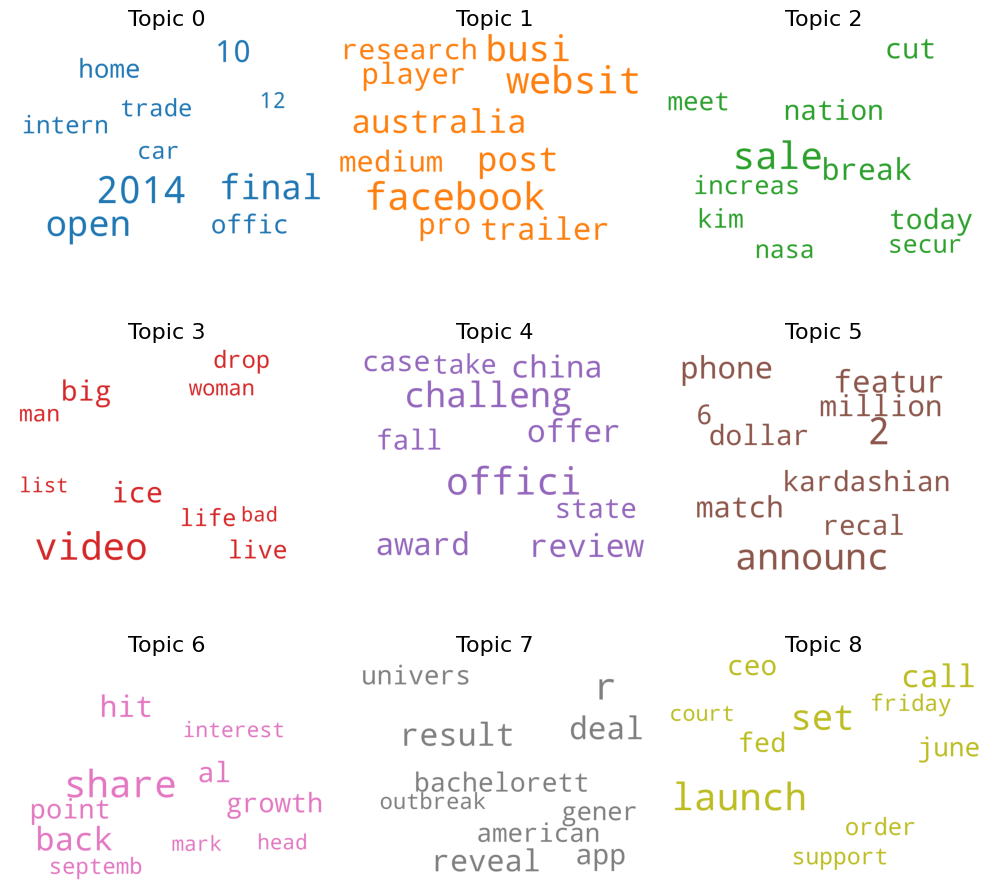

In [96]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [161]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
doc_term_matrix = [dictionary.doc2bow(i) for i in clean_corpus]
topic_weights = []
for i, row_list in enumerate(lda_model[doc_term_matrix[:100000]]):
    weights = []
    idx = 0
    # print(len(row_list))
    for j in range(10):
        if idx<len(row_list) and row_list[idx][0]==j:
            # print(row_list[idx][0], j)
            weights.append(row_list[idx][1])
            idx +=1
        else:
            weights.append(0)
    topic_weights.append(weights)
    # print(topic_weights)
    

# hm = np.array([[y for (x,y) in lda_model[doc_term_matrix[i]]] for i in range(len(variety_corpus))])
        
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17123 samples in 0.004s...
[t-SNE] Computed neighbors for 17123 samples in 0.704s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17123
[t-SNE] Computed conditional probabilities for sample 2000 / 17123
[t-SNE] Computed conditional probabilities for sample 3000 / 17123
[t-SNE] Computed conditional probabilities for sample 4000 / 17123
[t-SNE] Computed conditional probabilities for sample 5000 / 17123
[t-SNE] Computed conditional probabilities for sample 6000 / 17123
[t-SNE] Computed conditional probabilities for sample 7000 / 17123
[t-SNE] Computed conditional probabilities for sample 8000 / 17123
[t-SNE] Computed conditional probabilities for sample 9000 / 17123
[t-SNE] Computed conditional probabilities for sample 10000 / 17123
[t-SNE] Computed conditional probabilities for sample 11000 / 17123
[t-SNE] Computed conditional probabilities for sample 12000 / 17123
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...